## Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.vision.gan import *
from fastai.utils.mem import *
from fastai.callbacks import *

import os
import torchvision
from torchvision.utils import save_image

from torchvision.models import vgg16_bn

In [8]:
import DAT259.setup as setup
import DAT259.wgan as wgan
import DAT259.superresgan as superres

In [4]:
path_mask = 'data/ISIC_mask'
path_img = 'data/ISIC_img'

## Create testset

In [5]:
setup.create_testset(path_img, path_mask, 500)

## Generate masks

In [6]:
file_names = setup.choose_data(Path(path_mask), 100)

wgan.generate_masks(file_names, 100, path_mask, 1, bs=50) 

In [5]:
#path_gen_masks = 'data/generated_mask_100'
#wgan.image_cleaner(path_gen_masks)

# Train Generator

In [16]:
file_names = setup.get_data(Path('data/csv/csv_100'))
path_mask = Path(path_mask)
path_img = Path(path_img)
#base_loss = F.l1_loss

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,5.357591,2719.053467,34.535522,4.309949,13.098804,0.391841,405.544220,2258.714844,2.458344,00:22


epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,1137.157837,5.136381,0.851435,0.370932,0.367268,0.161844,1.727559,1.451621,0.205721,00:19


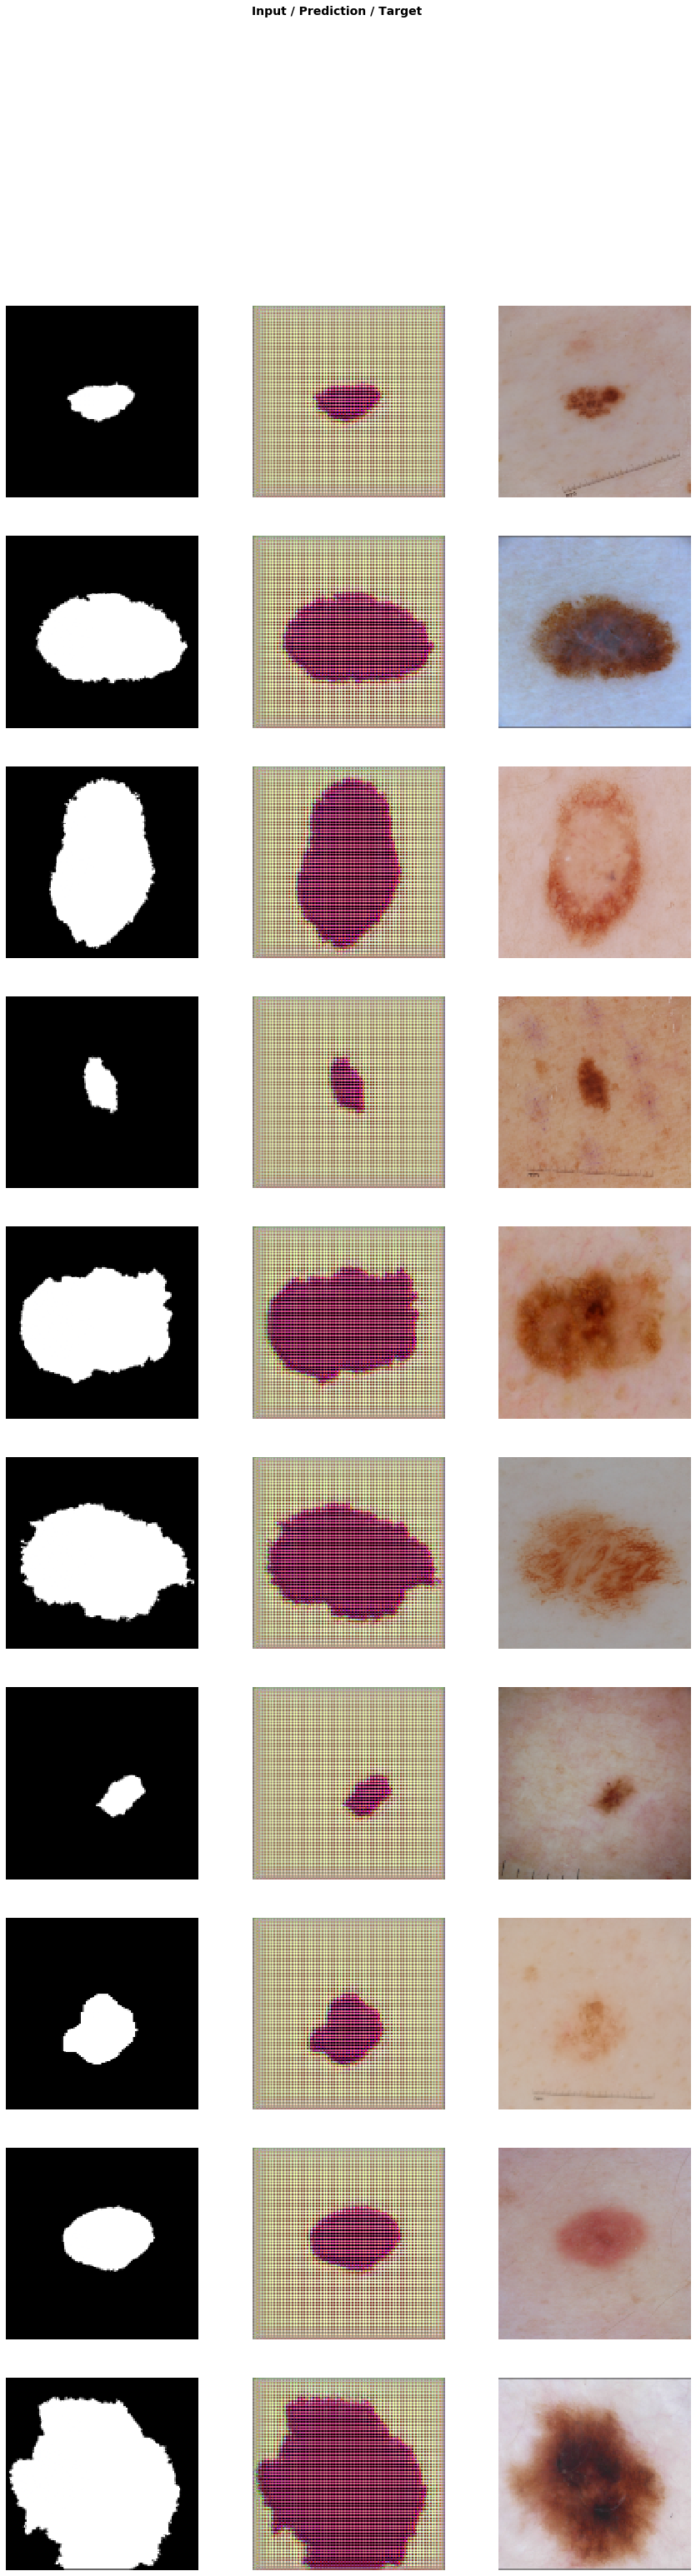

In [20]:
#superres.base_loss = base_loss
learn = superres.train_generator(file_names, path_mask, path_img, num_epochs=1)

# Train Critic

In [ ]:
loss_critic = AdaptiveLoss(nn.BCEWithLogitsLoss())
train_critic(2000)